# Climate Analysis

In [76]:
# import dependancies
from sqlalchemy import create_engine, inspect, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import matplotlib.pyplot as plt
import pandas as pd
from flask import jsonify
import os

In [22]:
# Creating engine and setting up Sqlite database access
engine = create_engine('sqlite:///hawaii.sqlite')

Base = automap_base()
Base.prepare(engine, reflect=True)

Base.classes.keys()
Measurement = Base.classes.measurements
Station = Base.classes.stations

session = Session(engine)
inspector = inspect(engine)

In [23]:
# Checking column names
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR(255)
date VARCHAR(255)
prcp FLOAT
tobs INTEGER


In [24]:
# Checking column names
columns = inspector.get_columns('stations')
for c in columns:
    print(c['name'], c["type"])

station VARCHAR(255)
name VARCHAR(255)
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [25]:
# Query
results = session.query(Measurement.date, Measurement.prcp)\
                        .filter(Measurement.date >= '2016-08-23')\
                        .order_by(Measurement.date.desc())

In [26]:
# Checking and formatting df from query
prcp_df = pd.DataFrame(results[::])
prcp_df.set_index('date', inplace=True)
prcp_df.rename(columns={'prcp':'Precipitation'}, inplace=True)
prcp_df.head()

,Precipitation
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


In [27]:
# Setting up and formatting plot
plt.style.use('seaborn')
prcp_df.plot()
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.title("Rain In Hawaii")

Text(0.5,1,'Rain In Hawaii')

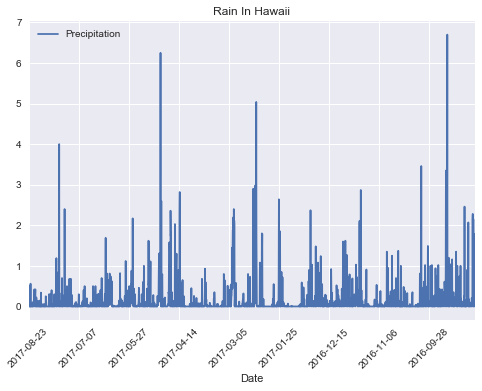

In [28]:
plt.show()

In [29]:
# Finding station count
station_count = session.query(Station).count()
station_count

9

In [30]:
# Query
most_active_stations = session.query(Measurement.station, func.count(Measurement.date)) \
                                    .group_by(Measurement.station) \
                                    .order_by(func.count(Measurement.date).desc()).all()

In [31]:
# Finding most active station
stations_df = pd.DataFrame(most_active_stations, columns=['station','count'])
stations_df
# USC00519281 --- 2772   ---> Most Active Station

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [32]:
# Query
results = session.query(Measurement.date, Measurement.tobs) \
                        .filter(Measurement.date >= '2016-08-23') \
                        .filter(Measurement.station == 'USC00519281') \
                        .order_by(Measurement.date.desc())

In [33]:
# Creating a tobs list
tobs = [x[1] for x in results]

In [34]:
# Creatting and formatting tobs plot
plt.hist(tobs, bins=12, color='blue')
plt.title('Tobs')
plt.legend(loc='best')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

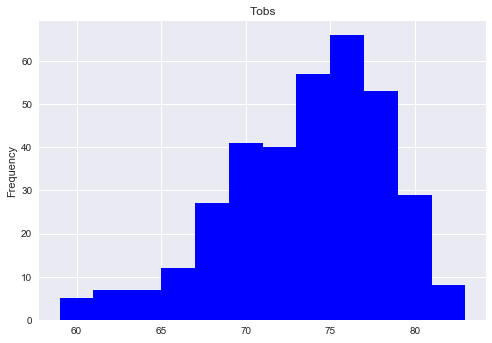

In [35]:
plt.show()

In [36]:
# Finding temps for trip range
def runCalcTemps(start_date, end_date):
    
    #Query
    results = session.query(Measurement.date, Measurement.tobs) \
                            .filter(Measurement.date >= start_date) \
                            .filter(Measurement.date <= end_date) \
                            .order_by(Measurement.date.asc())
    # Casting to DF
    temps_df = pd.DataFrame(results[::], columns=['date','temp'])
    
    # Creating and formatting plot
    plt.bar('', temps_df['temp'].mean(), yerr=temps_df['temp'].max()-temps_df['temp'].min(), color='lightskyblue')
    plt.title('Trip Avg Temp')
    plt.ylabel('Temp (F)')
    plt.show()

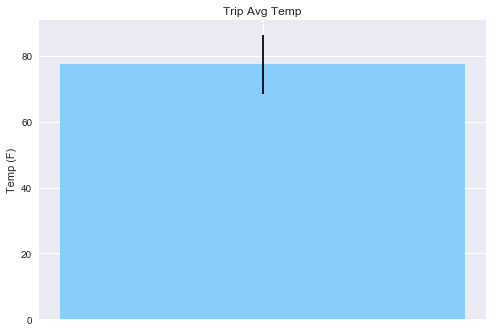

In [37]:
runCalcTemps('2017-06-01', '2017-06-10')